In [119]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
pwd

'/Users/miguelamaro/code/miguelamaro4/Final_Project/wmillfailprev/notebooks'

In [102]:
columns_drop_metmast = ['Min_Raindetection', 'Avg_Raindetection', 'Avg_Raindetection', 'Anemometer1_Freq', 'Anemometer1_Offset', 'Anemometer1_CorrGain', 'Anemometer1_CorrOffset', 'Anemometer2_Freq', 'Anemometer2_Offset', 'Anemometer2_CorrGain', 'Anemometer2_CorrOffset', 'DistanceAirPress', 'AirRessureSensorZeroOffset']

columns_drop_signals = ['Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_ReactPwrGen2']

In [133]:
df_failures = pd.read_csv(r'../rawdata/wind-farm-1-failures-training.csv', sep=';')

df_failures['Timestamp'] = pd.to_datetime(df_failures['Timestamp'])
#df_failures[df_failures['Turbine_ID']=='T07']

df_failures['Fail_ID'] = df_failures.index+1

In [129]:
type(df_failures['Timestamp'][8])

pandas._libs.tslibs.timestamps.Timestamp

In [131]:
df_failures['Timestamp'][8].minute

25

In [121]:
df_failures

,Turbine_ID,Component,Timestamp,Remarks,Fail_ID
0,T11,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator,1
1,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00+00:00,Error in pitch regulation,2
2,T07,GENERATOR_BEARING,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...,3
3,T09,GENERATOR_BEARING,2016-06-07 16:59:00+00:00,High tempemperature generator bearing,4
4,T07,TRANSFORMER,2016-07-10 03:46:00+00:00,High temperature transformer,5
5,T06,GENERATOR,2016-07-11 19:48:00+00:00,Generator replaced,6
6,T01,GEARBOX,2016-07-18 02:10:00+00:00,Gearbox pump damaged,7
7,T06,GENERATOR,2016-07-24 17:01:00+00:00,Generator temperature sensor failure,8
8,T09,GENERATOR_BEARING,2016-08-22 18:25:00+00:00,High temperature generator bearing,9
9,T07,TRANSFORMER,2016-08-23 02:21:00+00:00,High temperature transformer. Transformer refr...,10


In [153]:
df_failures['Timestamp_new'] = df_failures.apply(lambda x: x['Timestamp'] - datetime.timedelta(minutes=x['Timestamp'].minute % 10,
                             seconds=x['Timestamp'].second,
                             microseconds=x['Timestamp'].microsecond),axis=1)

In [154]:
df_failures['Timestamp_new']

0    2016-03-03 19:00:00+00:00
1    2016-04-04 18:50:00+00:00
2    2016-04-30 12:40:00+00:00
3    2016-06-07 16:50:00+00:00
4    2016-07-10 03:40:00+00:00
5    2016-07-11 19:40:00+00:00
6    2016-07-18 02:10:00+00:00
7    2016-07-24 17:00:00+00:00
8    2016-08-22 18:20:00+00:00
9    2016-08-23 02:20:00+00:00
10   2016-09-04 08:00:00+00:00
11   2016-10-02 17:00:00+00:00
12   2016-10-11 08:00:00+00:00
13   2016-10-17 09:10:00+00:00
14   2016-10-17 17:40:00+00:00
15   2016-10-27 16:20:00+00:00
16   2017-01-25 12:50:00+00:00
17   2017-04-26 18:00:00+00:00
18   2017-06-17 11:30:00+00:00
19   2017-08-11 13:10:00+00:00
20   2017-08-19 09:40:00+00:00
21   2017-08-20 06:00:00+00:00
22   2017-08-21 14:40:00+00:00
Name: Timestamp_new, dtype: datetime64[ns, UTC]

In [152]:
df_failures['Timestamp'][12] - datetime.timedelta(minutes=df_failures['Timestamp'][12].minute % -10,
                             seconds=df_failures['Timestamp'][12].second,
                             microseconds=df_failures['Timestamp'][12].microsecond)

Timestamp('2016-10-11 08:10:00+0000', tz='UTC')

In [151]:
df_failures['Timestamp'][12]

Timestamp('2016-10-11 08:06:00+0000', tz='UTC')

In [124]:
df_failures['Timestamp_new'] = df_failures['Timestamp'] - datetime.timedelta(minutes=df_failures['Timestamp'].minute % 10,
                             seconds=df_failures['Timestamp'].second,
                             microseconds=df_failures['Timestamp'].microsecond)

AttributeError: 'Series' object has no attribute 'minute'

In [104]:
df_signals = pd.read_csv('../rawdata/wind-farm-1-signals-training.csv', sep=';')#, nrows=100000)
df_signals = df_signals.drop(columns=columns_drop_signals)
df_signals = df_signals[['Turbine_ID','Timestamp','Gen_RPM_Max']]
df_signals['Timestamp']=pd.to_datetime(df_signals['Timestamp'])
df_signals.head()

,Turbine_ID,Timestamp,Gen_RPM_Max
0,T11,2016-01-01 00:00:00+00:00,1339.4
1,T06,2016-01-01 00:00:00+00:00,1270.0
2,T01,2016-01-01 00:00:00+00:00,1277.4
3,T09,2016-01-01 00:00:00+00:00,1376.7
4,T07,2016-01-01 00:00:00+00:00,1317.5


In [105]:
df_signals.count()

Turbine_ID     434145
Timestamp      434145
Gen_RPM_Max    434145
dtype: int64

## Bloco Variavel Alvo

Requisitos:

-> Ter as variaveis Timestamp já em formato datetime

In [106]:
def join(df_signals, df_failures):
    return pd.merge(df_signals, df_failures, on='Turbine_ID')
    



In [107]:
#from target import construct_target

In [108]:
#construct_target.join(df_signals, df_failures)

In [109]:
    
df_signals_failures = join(df_signals, df_failures)

In [110]:
df_signals_failures         

df_signals_failures['Days_To_Failure'] = round((df_signals_failures['Timestamp_y'] - df_signals_failures['Timestamp_x']) / np.timedelta64(24, 'h'),2)


In [111]:
df_signals_failures['Days_To_Failure'].min()

,Turbine_ID,Timestamp_x,Gen_RPM_Max,Component,Timestamp_y,Remarks,Days_To_Failure
0,T11,2016-01-01 00:00:00+00:00,1339.4,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator,62.79
1,T11,2016-01-01 00:00:00+00:00,1339.4,HYDRAULIC_GROUP,2016-10-17 17:44:00+00:00,Hydraulic group error in the brake circuit,290.74
2,T11,2016-01-01 00:00:00+00:00,1339.4,HYDRAULIC_GROUP,2017-04-26 18:06:00+00:00,Hydraulic group error in the brake circuit,481.75
3,T11,2016-01-01 00:10:00+00:00,1400.5,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator,62.78
4,T11,2016-01-01 00:10:00+00:00,1400.5,HYDRAULIC_GROUP,2016-10-17 17:44:00+00:00,Hydraulic group error in the brake circuit,290.73
...,...,...,...,...,...,...,...
1992769,T07,2017-09-01 00:00:00+00:00,1292.0,TRANSFORMER,2016-07-10 03:46:00+00:00,High temperature transformer,-417.84
1992770,T07,2017-09-01 00:00:00+00:00,1292.0,TRANSFORMER,2016-08-23 02:21:00+00:00,High temperature transformer. Transformer refr...,-373.90
1992771,T07,2017-09-01 00:00:00+00:00,1292.0,HYDRAULIC_GROUP,2017-06-17 11:35:00+00:00,Oil leakage in Hub,-75.52
1992772,T07,2017-09-01 00:00:00+00:00,1292.0,GENERATOR_BEARING,2017-08-20 06:08:00+00:00,Generator bearings damaged,-11.74


In [63]:
def Failure_Time_Horizon(days):
    if 2 <= days <=60:
        Flag=1
    else:
        Flag=0
    return Flag

In [64]:
def Failure_Time_and_Component(days, component):
    if 2 <= days <=60:
        if component == "GEARBOX":
            Flag=1
        elif component == "GENERATOR": 
            Flag=2
        elif component == "GENERATOR_BEARING": 
            Flag=3
        elif component == "TRANSFORMER": 
            Flag=4
        else: 
            Flag=5
    else:
        Flag=0
        
    return Flag

In [65]:
df_signals_failures['Target_2C'] = df_signals_failures.apply(lambda x: Failure_Time_Horizon(x['Days_To_Failure']),axis=1)


In [66]:
#df_signals_failures['Target_6C'] = df_signals_failures.apply(lambda x: Failure_Time_and_Component(x['Days_To_Failure'], x['Component']),axis=1)


In [67]:
components_list = ['GEARBOX', 'GENERATOR', 'GENERATOR_BEARING', 'TRANSFORMER', 'HYDRAULIC_GROUP']

In [68]:
for component in components_list:
    df_signals_failures[f'Fail_{component}'] = df_signals_failures.apply(lambda x: Failure_Time_Horizon(x['Days_To_Failure']) if x['Component']==component else 0 ,axis=1)

In [69]:


df_Target_2C = df_signals_failures[['Turbine_ID','Timestamp_x','Target_2C']][df_signals_failures['Target_2C']==1].drop_duplicates()
#df_Target_6C = df_signals_failures[['Turbine_ID','Timestamp_x','Target_6C']][df_signals_failures['Target_6C']!=0].drop_duplicates()

df_Fail_GEARBOX = df_signals_failures[['Turbine_ID','Timestamp_x','Fail_GEARBOX']][df_signals_failures['Fail_GEARBOX']==1].drop_duplicates()
df_Fail_GENERATOR = df_signals_failures[['Turbine_ID','Timestamp_x','Fail_GENERATOR']][df_signals_failures['Fail_GENERATOR']==1].drop_duplicates()
df_Fail_GENERATOR_BEARING = df_signals_failures[['Turbine_ID','Timestamp_x','Fail_GENERATOR_BEARING']][df_signals_failures['Fail_GENERATOR_BEARING']==1].drop_duplicates()
df_Fail_TRANSFORMER = df_signals_failures[['Turbine_ID','Timestamp_x','Fail_TRANSFORMER']][df_signals_failures['Fail_TRANSFORMER']==1].drop_duplicates()
df_Fail_HYDRAULIC_GROUP = df_signals_failures[['Turbine_ID','Timestamp_x','Fail_HYDRAULIC_GROUP']][df_signals_failures['Fail_HYDRAULIC_GROUP']==1].drop_duplicates()




In [70]:
df_list = [df_Target_2C, df_Fail_GEARBOX, df_Fail_GENERATOR, df_Fail_GENERATOR_BEARING, df_Fail_TRANSFORMER, df_Fail_HYDRAULIC_GROUP]
#, df_Target_6C

In [71]:
          
for df_ in df_list:
    
    df_signals=pd.merge(df_signals, df_, how='left', left_on=['Turbine_ID','Timestamp'],  right_on=['Turbine_ID','Timestamp_x']).drop(columns='Timestamp_x')


In [72]:
var_list = ['Target_2C', 'Fail_GEARBOX', 'Fail_GENERATOR', 'Fail_GENERATOR_BEARING', 'Fail_TRANSFORMER', 'Fail_HYDRAULIC_GROUP']
#, 'Target_6C'

In [73]:
for var in var_list:

    df_signals[var] = df_signals.apply(lambda x: int(x[var]) if x[var]==1 else int(0), axis=1)

In [74]:
df_target = df_signals.drop(columns='Gen_RPM_Max')

In [75]:
df_target.to_csv('df_target.csv')

In [76]:
pd.read_csv('df_target.csv')

,Unnamed: 0,Turbine_ID,Timestamp,Target_2C,Fail_GEARBOX,Fail_GENERATOR,Fail_GENERATOR_BEARING,Fail_TRANSFORMER,Fail_HYDRAULIC_GROUP
0,0,T11,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
1,1,T06,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
2,2,T01,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
3,3,T09,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
4,4,T07,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
434140,434140,T11,2017-09-01 00:00:00+00:00,0,0,0,0,0,0
434141,434141,T09,2017-09-01 00:00:00+00:00,0,0,0,0,0,0
434142,434142,T06,2017-09-01 00:00:00+00:00,0,0,0,0,0,0
434143,434143,T01,2017-09-01 00:00:00+00:00,0,0,0,0,0,0


In [92]:
#df_target[df_target['Fail_GENERATOR']==1][2010:2250]

df_target[df_target['Timestamp']=='2016-04-02 18:00:00+00:00']

,Turbine_ID,Timestamp,Target_2C,Fail_GEARBOX,Fail_GENERATOR,Fail_GENERATOR_BEARING,Fail_TRANSFORMER,Fail_HYDRAULIC_GROUP
66727,T06,2016-04-02 18:00:00+00:00,1,0,0,0,0,1
66728,T07,2016-04-02 18:00:00+00:00,1,0,0,1,0,0
66729,T11,2016-04-02 18:00:00+00:00,0,0,0,0,0,0
66730,T01,2016-04-02 18:00:00+00:00,0,0,0,0,0,0
66731,T09,2016-04-02 18:00:00+00:00,0,0,0,0,0,0


In [98]:
df_target.groupby(['Target_2C','Fail_GEARBOX','Fail_GENERATOR','Fail_GENERATOR_BEARING','Fail_TRANSFORMER','Fail_HYDRAULIC_GROUP']).count()

Turbine_ID  Timestamp  \
Target_2C Fail_GEARBOX Fail_GENERATOR                          
0         0            0                   281741     281741   
1         0            0                    97318      97318   
                       1                    38609      38609   
          1            0                    16477      16477   

                                       Fail_GENERATOR_BEARING  \
Target_2C Fail_GEARBOX Fail_GENERATOR                           
0         0            0                               281741   
1         0            0                                97318   
                       1                                38609   
          1            0                                16477   

                                       Fail_TRANSFORMER  Fail_HYDRAULIC_GROUP  
Target_2C Fail_GEARBOX Fail_GENERATOR                                          
0         0            0                         281741                281741  
1         0            0                          97318                 97318  
                       1                          38609                 38609  
          1            0                          16477                 16477

In [ ]:
df_target.groupby(['Target_2C','Fail_GEARBOX','Fail_GENERATOR','Fail_GENERATOR_BEARING','Fail_TRANSFORMER','Fail_HYDRAULIC_GROUP']).count()

In [ ]:
df_target['Target_6C'].value_counts()

In [78]:
df_target

,Turbine_ID,Timestamp,Target_2C,Fail_GEARBOX,Fail_GENERATOR,Fail_GENERATOR_BEARING,Fail_TRANSFORMER,Fail_HYDRAULIC_GROUP
0,T11,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
1,T06,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
2,T01,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
3,T09,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
4,T07,2016-01-01 00:00:00+00:00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
434140,T11,2017-09-01 00:00:00+00:00,0,0,0,0,0,0
434141,T09,2017-09-01 00:00:00+00:00,0,0,0,0,0,0
434142,T06,2017-09-01 00:00:00+00:00,0,0,0,0,0,0
434143,T01,2017-09-01 00:00:00+00:00,0,0,0,0,0,0


In [231]:
434145

434145

In [ ]:
434145

In [112]:
df_signals_failures['Fail_Generator'].value_counts()

0    1938154
1      54620
Name: Fail_Generator, dtype: int64

In [92]:
df_signals_failures[['Target_2C']].value_counts()

Target_2C
0            1805835
1             186939
dtype: int64

In [98]:
df_signals_failures[['Target_2C']]==0

,Target_2C
0,True
1,True
2,True
3,True
4,True
...,...
1992769,True
1992770,True
1992771,True
1992772,True


In [136]:
#exemplo registos com target=1
df_signals_failures.iloc[192770:]

,Turbine_ID,Timestamp_x,Gen_RPM_Max,Component,Timestamp_y,Remarks,Days_To_Failure,Target_2C,Target_6C,Fail_GEARBOX,Fail_GENERATOR,Fail_GENERATOR_BEARING,Fail_TRANSFORMER,Fail_HYDRAULIC_GROUP
192770,T11,2017-03-24 00:30:00+00:00,195.7,HYDRAULIC_GROUP,2017-04-26 18:06:00+00:00,Hydraulic group error in the brake circuit,33.73,1,5,0,0,0,0,1
192771,T11,2017-03-24 00:40:00+00:00,1368.8,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator,-385.24,0,0,0,0,0,0,0
192772,T11,2017-03-24 00:40:00+00:00,1368.8,HYDRAULIC_GROUP,2016-10-17 17:44:00+00:00,Hydraulic group error in the brake circuit,-157.29,0,0,0,0,0,0,0
192773,T11,2017-03-24 00:40:00+00:00,1368.8,HYDRAULIC_GROUP,2017-04-26 18:06:00+00:00,Hydraulic group error in the brake circuit,33.73,1,5,0,0,0,0,1
192774,T11,2017-03-24 00:50:00+00:00,1261.4,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator,-385.24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992769,T07,2017-09-01 00:00:00+00:00,1292.0,TRANSFORMER,2016-07-10 03:46:00+00:00,High temperature transformer,-417.84,0,0,0,0,0,0,0
1992770,T07,2017-09-01 00:00:00+00:00,1292.0,TRANSFORMER,2016-08-23 02:21:00+00:00,High temperature transformer. Transformer refr...,-373.90,0,0,0,0,0,0,0
1992771,T07,2017-09-01 00:00:00+00:00,1292.0,HYDRAULIC_GROUP,2017-06-17 11:35:00+00:00,Oil leakage in Hub,-75.52,0,0,0,0,0,0,0
1992772,T07,2017-09-01 00:00:00+00:00,1292.0,GENERATOR_BEARING,2017-08-20 06:08:00+00:00,Generator bearings damaged,-11.74,0,0,0,0,0,0,0


In [138]:
df_signals_failures.count()

Turbine_ID                1992774
Timestamp_x               1992774
Gen_RPM_Max               1992774
Component                 1992774
Timestamp_y               1992774
Remarks                   1992774
Days_To_Failure           1992774
Target_2C                 1992774
Target_6C                 1992774
Fail_GEARBOX              1992774
Fail_GENERATOR            1992774
Fail_GENERATOR_BEARING    1992774
Fail_TRANSFORMER          1992774
Fail_HYDRAULIC_GROUP      1992774
dtype: int64

In [99]:
df_signals_failures[df_signals_failures[['Target_2C']]==0]

,Turbine_ID,Timestamp_x,Gen_RPM_Max,Component,Timestamp_y,Remarks,Days_To_Failure,Target_2C
0,NaN,NaT,NaN,NaN,NaT,NaN,NaN,0.0
1,NaN,NaT,NaN,NaN,NaT,NaN,NaN,0.0
2,NaN,NaT,NaN,NaN,NaT,NaN,NaN,0.0
3,NaN,NaT,NaN,NaN,NaT,NaN,NaN,0.0
4,NaN,NaT,NaN,NaN,NaT,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
1992769,NaN,NaT,NaN,NaN,NaT,NaN,NaN,0.0
1992770,NaN,NaT,NaN,NaN,NaT,NaN,NaN,0.0
1992771,NaN,NaT,NaN,NaN,NaT,NaN,NaN,0.0
1992772,NaN,NaT,NaN,NaN,NaT,NaN,NaN,0.0


In [79]:
df.apply(lambda x: func(x['col1'],x['col2']),axis=1)


TypeError: 'float' object is not subscriptable

In [77]:
#df_signals_failures.apply(lambda x: Failure_Time_Horizon(df_signals_failures['Days_To_Failure']))

In [14]:
fig = plt.figure(figsize=(20,10))
plt.plot(df_signals['Timestamp'], df_signals['Gen_RPM_Max'])


Error in callback <function flush_figures at 0x1183c00d0> (for post_execute):


KeyboardInterrupt: 

In [7]:
434145/5

86829.0

In [8]:
df_signals.describe()

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
count,434145.000000,434145.000000,434145.000000,434145.000000,434138.000000,434145.000000,434145.000000,434145.000000,434145.000000,434145.000000,...,434145.000000,434145.000000,434145.000000,434145.000000,434145.000000,434145.000000,434145.000000,434145.000000,434145.000000,434145.000000
mean,1180.310084,923.317963,1055.186079,68.819458,47.068879,64.429142,64.082938,63.717733,37.775914,47.474406,...,-535.226245,-368.445122,-674.827909,75.668842,503.261352,662.075995,320.132837,82.694327,43.381573,185.173063
std,642.006443,614.935372,617.817715,112.115169,17.601409,28.603491,27.594479,27.174093,8.466287,7.102676,...,422.332435,386.130033,441.406806,97.040909,411.198363,438.854230,354.557765,100.024771,14.201787,94.590627
min,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000,14.000000,14.000000,20.000000,15.000000,...,-1000.000000,-1000.000000,-1000.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,13.000000,0.000000
25%,303.700000,183.900000,261.400000,14.000000,35.000000,42.000000,42.000000,42.000000,30.000000,42.000000,...,-984.600000,-583.300000,-1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,102.100000
50%,1421.100000,1231.300000,1276.800000,28.500000,44.000000,60.000000,61.000000,60.000000,37.000000,49.000000,...,-623.600000,-249.300000,-1000.000000,18.700000,501.300000,1000.000000,249.300000,32.400000,41.000000,164.500000
75%,1681.900000,1369.400000,1592.300000,70.800000,57.000000,78.000000,77.000000,77.000000,46.000000,53.000000,...,0.000000,0.000000,0.000000,142.700000,961.300000,1000.000000,495.200000,155.000000,53.000000,275.300000
max,2040.900000,1672.000000,1684.400000,823.200000,205.000000,205.000000,205.000000,205.000000,55.000000,65.000000,...,0.000000,200.000000,0.000000,500.000000,1000.000000,1000.000000,1000.000000,500.000000,205.000000,359.000000


In [9]:
df_signals_columns = list(df_signals.columns)

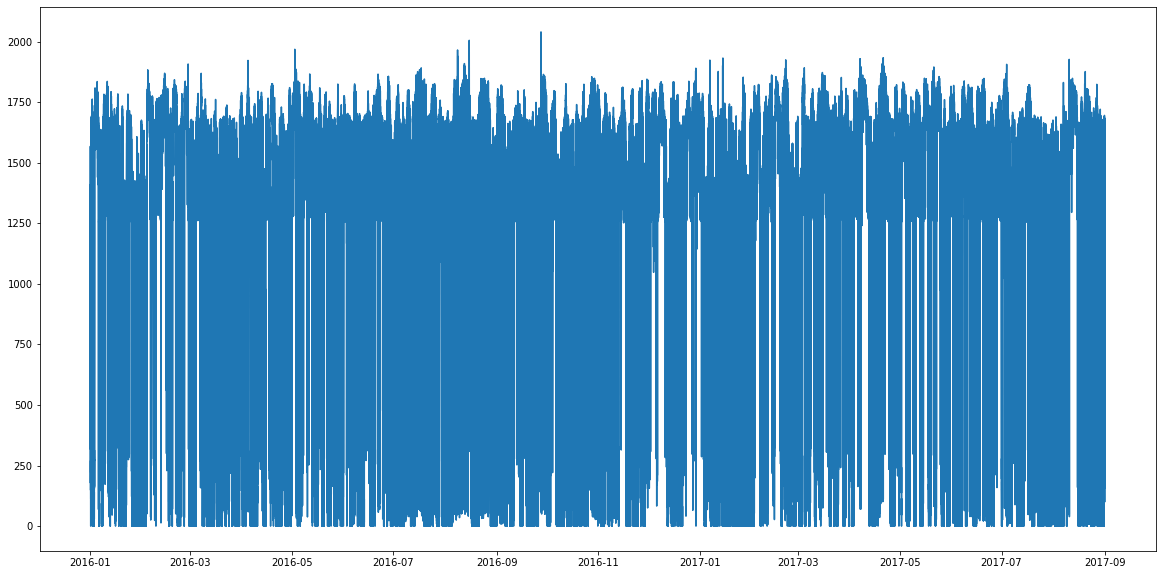

In [10]:
fig = plt.figure(figsize=(20,10))
plt.plot(df_signals['Timestamp'], df_signals['Gen_RPM_Max'])


In [ ]:
for column in df_signals_columns[:10]:
    fig = plt.figure(figsize=(20,10))
    plt.plot(df_signals['Timestamp'], df_signals[column])
    plt.title(column)

KeyboardInterrupt: 

In [ ]:
plt.plot(df_signals['Timestamp'], df_signals[column])

In [ ]:
df_metmast = pd.read_csv('../rawdata/wind-farm-1-metmast-training.csv', sep=';')

df_metmast = df_metmast.drop(columns=columns_drop_metmast)

df_metmast

In [ ]:
df_metmast['Timestamp']=pd.to_datetime(df_metmast['Timestamp'])

In [ ]:
from datetime as dt

df_metmast['Timestamp'].dt.year()

In [15]:
len(df_metmast.columns) + len(df_signals.columns)

124

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(df_metmast['Timestamp'][], df_metmast['Min_Windspeed1'])

In [11]:
df_metmast.describe()

,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,Max_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
count,69960.000000,69961.000000,69960.000000,69960.000000,69960.000000,69961.000000,69960.000000,69960.000000,69960.000000,69961.000000,...,69961.0,6.996100e+04,6.996100e+04,69961.0,69961.0,69961.0,69961.0,69961.000000,69961.000000,69961.000000
mean,4.245343,8.413618,6.338668,0.926280,4.341732,8.317262,6.338642,0.807165,232.267953,233.634939,...,0.0,4.990000e-02,2.400000e-01,1.0,0.0,0.0,600.0,123.607238,123.610655,409.436958
std,2.654873,4.808946,3.733035,1.213568,2.796495,4.693258,3.740070,0.998506,24.587511,18.684133,...,0.0,6.938943e-18,1.665346e-16,0.0,0.0,0.0,0.0,74.831436,74.974476,5.103327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,4.990000e-02,2.400000e-01,1.0,0.0,0.0,600.0,0.000000,0.000000,392.000000
25%,2.300000,4.700000,3.500000,0.150000,2.200000,4.700000,3.500000,0.150000,236.000000,236.000000,...,0.0,4.990000e-02,2.400000e-01,1.0,0.0,0.0,600.0,67.000000,66.000000,406.000000
50%,3.700000,7.500000,5.600000,0.480000,3.800000,7.500000,5.600000,0.470000,236.000000,236.000000,...,0.0,4.990000e-02,2.400000e-01,1.0,0.0,0.0,600.0,108.000000,109.000000,409.000000
75%,5.800000,11.300000,8.500000,1.190000,6.000000,11.200000,8.600000,1.060000,236.000000,236.000000,...,0.0,4.990000e-02,2.400000e-01,1.0,0.0,0.0,600.0,167.000000,168.000000,412.000000
max,17.800000,30.800000,23.100000,35.100000,17.300000,29.000000,22.900000,35.930000,358.000000,357.000000,...,0.0,4.990000e-02,2.400000e-01,1.0,0.0,0.0,600.0,459.000000,455.000000,428.000000


In [ ]:
df_metmast.iloc[:;213:220]

In [27]:
len(df_metmast.columns)

41

In [12]:
df_metmast.columns

Index(['Timestamp', 'Min_Windspeed1', 'Max_Windspeed1', 'Avg_Windspeed1',
       'Var_Windspeed1', 'Min_Windspeed2', 'Max_Windspeed2', 'Avg_Windspeed2',
       'Var_Windspeed2', 'Min_Winddirection2', 'Max_Winddirection2',
       'Avg_Winddirection2', 'Var_Winddirection2', 'Min_AmbientTemp',
       'Max_AmbientTemp', 'Avg_AmbientTemp', 'Min_Pressure', 'Max_Pressure',
       'Avg_Pressure', 'Min_Humidity', 'Max_Humidity', 'Avg_Humidity',
       'Min_Precipitation', 'Max_Precipitation', 'Avg_Precipitation',
       'Min_Raindetection', 'Max_Raindetection', 'Avg_Raindetection',
       'Anemometer1_Freq', 'Anemometer1_Offset', 'Anemometer1_CorrGain',
       'Anemometer1_CorrOffset', 'Anemometer2_Freq', 'Anemometer2_Offset',
       'Anemometer2_CorrGain', 'Anemometer2_CorrOffset', 'DistanceAirPress',
       'AirRessureSensorZeroOffset', 'Anemometer1_Avg_Freq',
       'Anemometer2_Avg_Freq', 'Pressure_Avg_Freq'],
      dtype='object')

In [18]:
df_logs = pd.read_csv('../rawdata/wind-farm-1-logs-training.csv', sep=';')

In [19]:
df_logs

,TimeDetected,TimeReset,UnitTitle,Remark,UnitTitleDestination
0,2016-01-01T00:02:18+00:00,NaN,T11,External power ref.:2000kW,NaN
1,2016-01-01T00:07:15+00:00,NaN,T06,Generator 1 in,NaN
2,2016-01-01T00:11:33+00:00,NaN,T09,External power ref.:2000kW,NaN
3,2016-01-01T00:15:27+00:00,NaN,T01,Generator 1 in,NaN
4,2016-01-01T00:15:44+00:00,NaN,T01,External power ref.:2000kW,NaN
...,...,...,...,...,...
256226,2017-08-31T23:42:07+00:00,NaN,T11,"Nac.vent.2, nac/gear: 31/ 50°C",NaN
256227,2017-08-31T23:45:50+00:00,NaN,T09,External power ref.:2000kW,NaN
256228,2017-08-31T23:56:40+00:00,NaN,T11,External power ref.:2000kW,NaN
256229,2017-08-31T23:57:47+00:00,NaN,T07,External power ref.:2000kW,NaN


In [13]:
df_signals.describe()

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1316.200000,1231.200000,1259.060000,14.620000,41.20000,57.600000,58.200000,58.000000,33.20000,44.600000,...,-564.600000,-195.420000,-893.020000,183.600000,564.600000,893.020000,195.420000,183.600000,36.400000,208.260000
std,44.272057,3.371943,11.593662,7.288484,0.83666,4.037326,3.962323,3.082207,6.09918,2.073644,...,353.196241,326.290564,180.050693,101.231566,353.196241,180.050693,326.290564,101.231566,2.408319,8.263958
min,1270.000000,1226.100000,1248.500000,6.800000,40.00000,51.000000,52.000000,53.000000,30.00000,43.000000,...,-973.400000,-752.600000,-1000.000000,56.500000,144.400000,584.500000,0.000000,56.500000,33.000000,197.300000
25%,1277.400000,1229.500000,1249.000000,9.000000,41.00000,58.000000,57.000000,58.000000,30.00000,43.000000,...,-861.600000,-224.500000,-1000.000000,157.100000,307.100000,880.600000,0.000000,157.100000,35.000000,204.600000
50%,1317.500000,1232.800000,1254.900000,13.800000,41.00000,58.000000,59.000000,58.000000,30.00000,44.000000,...,-536.500000,0.000000,-1000.000000,180.000000,536.500000,1000.000000,0.000000,180.000000,37.000000,206.900000
75%,1339.400000,1233.300000,1270.900000,18.800000,42.00000,59.000000,61.000000,60.000000,32.00000,45.000000,...,-307.100000,0.000000,-880.600000,185.500000,861.600000,1000.000000,224.500000,185.500000,38.000000,214.000000
max,1376.700000,1234.300000,1272.000000,24.700000,42.00000,62.000000,62.000000,61.000000,44.00000,48.000000,...,-144.400000,0.000000,-584.500000,338.900000,973.400000,1000.000000,752.600000,338.900000,39.000000,218.500000


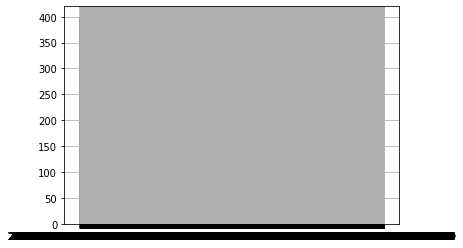

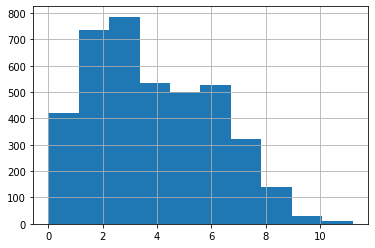

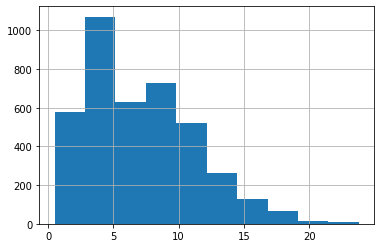

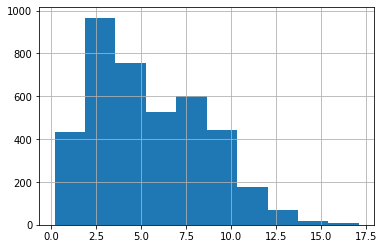

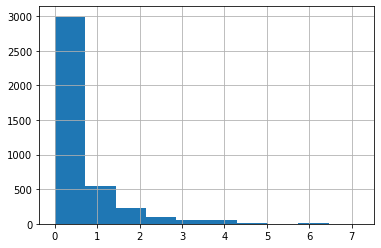

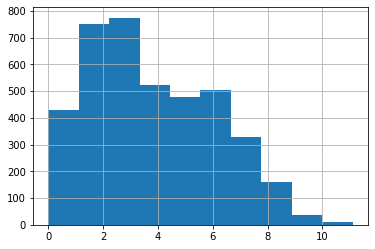

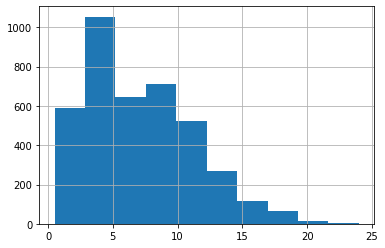

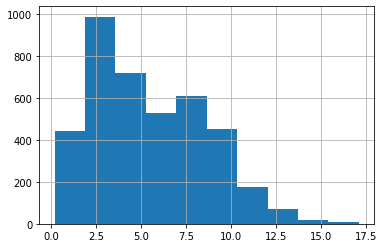

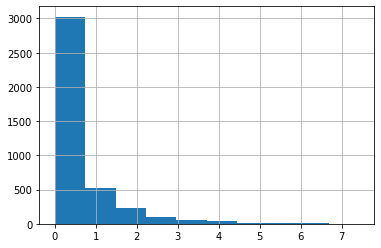

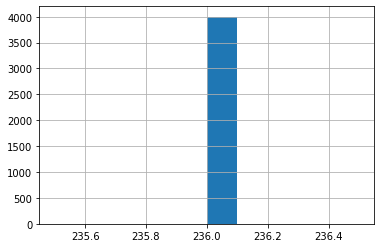

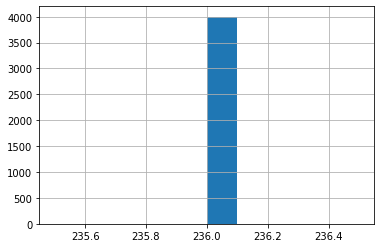

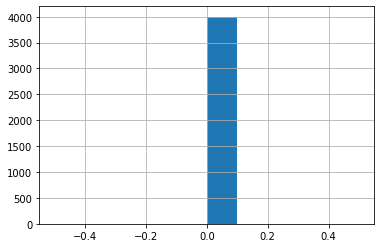

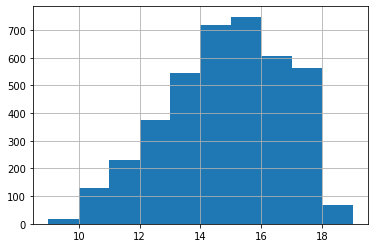

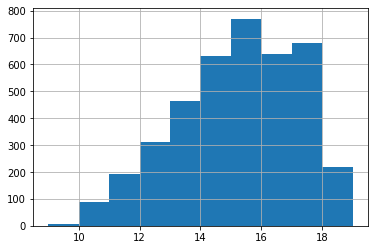

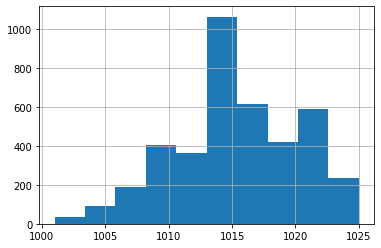

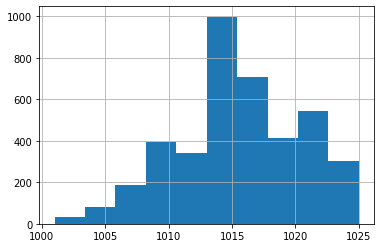

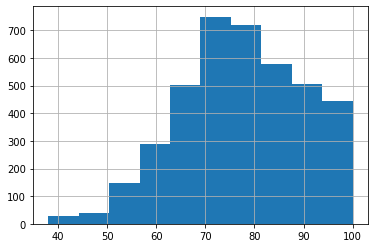

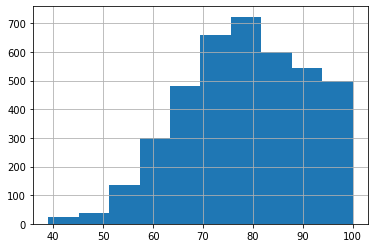

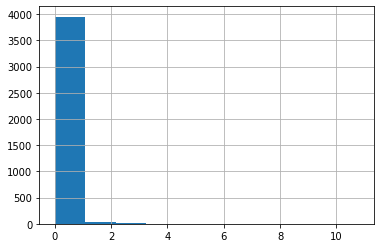

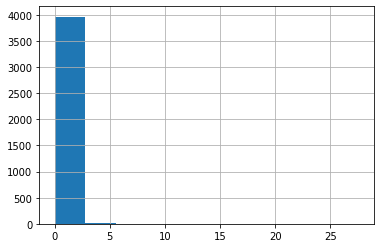

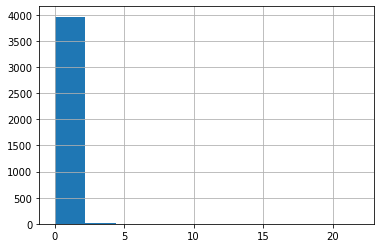

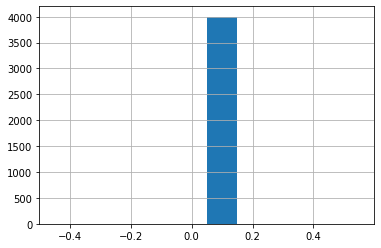

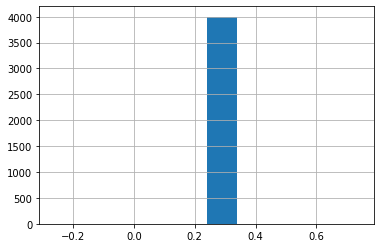

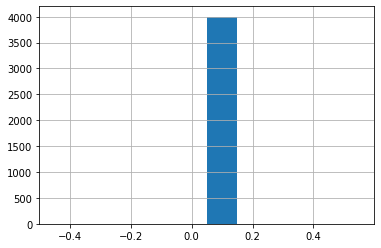

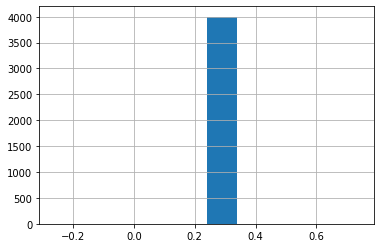

In [19]:
for i in df_metmast.select_dtypes(exclude=['int64']).columns:
    df_metmast[i].hist()
    plt.pyplot.show()

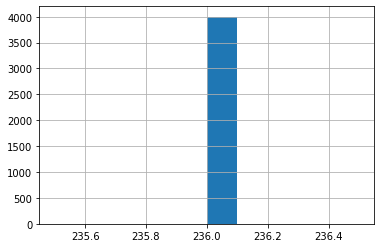

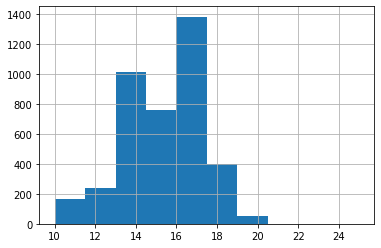

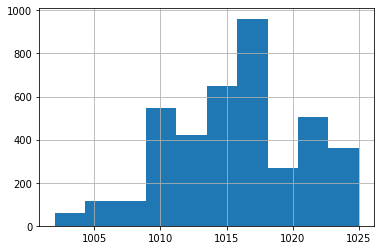

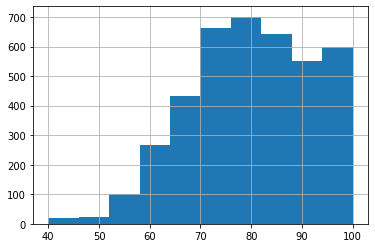

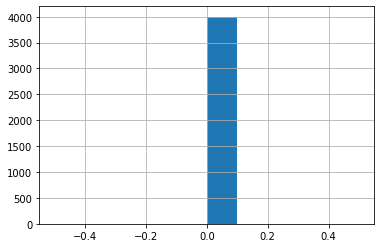

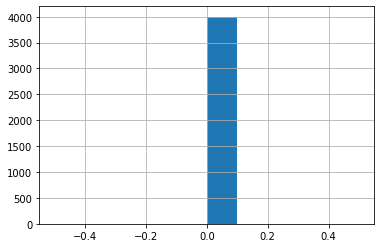

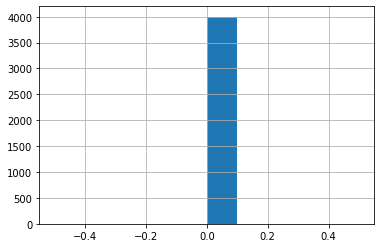

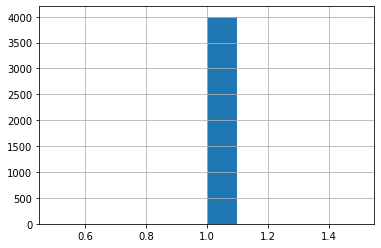

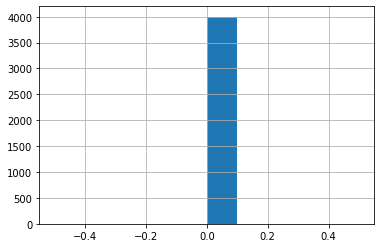

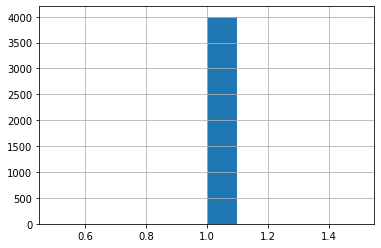

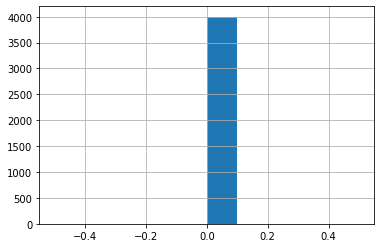

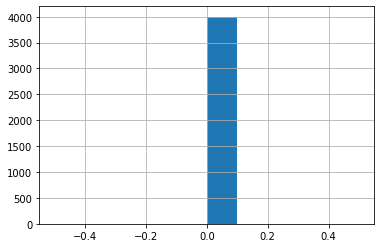

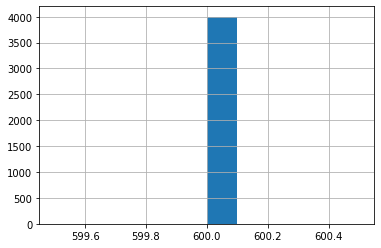

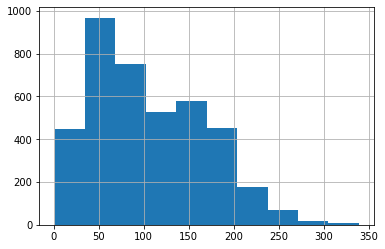

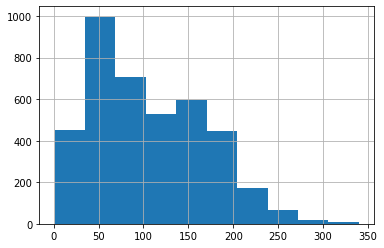

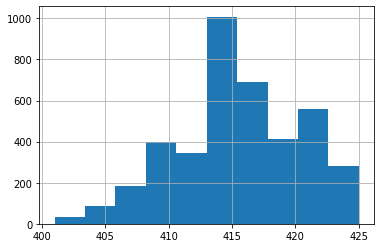

In [20]:
for i in df_metmast.select_dtypes(include=['int64']).columns:
    df_metmast[i].hist()
    plt.pyplot.show()